# Projekt 1
  
W ramach zadania należy rozwiązać równanie przewodności cieplnej.  
1. Ocena dst lub dst+: zadanie 1  
2. Ocena db: zadanie 2  
3. Ocena bdb: zadanie 3 

## Jednowymiarowe zagadnienie przewodności cieplnej (heat equation)

Równanie:
$$\frac{\partial u}{\partial t} = a^2\frac{\partial^2u}{\partial x^2}$$
  
$0 < x < L, L = \pi$  
$t > 0$  
$a = 0.2$  

Warunek początkowy:  
$f(x) = u(x, 0) = 4\sin^3(2x)$  

Zerowe warunki brzegowe:  
$u(0, t) = u(\pi, t) = 0$

## Zadanie 1
  
Znaleźć rozwiązanie dla równania przewodności cieplnej za pomocą metody rozdzielenia zmiennych.  
Na ocenę 3: rozwiązanie bez użycia **sympy**  
Na ocenę 3.5: rozwiązanie z użyciem **sympy** (tj. znalezienie lub zweryfikowanie uzyskanych "ręcznie" rozwiązań dla równań na funkcję $X(x)$ oraz $T(t)$).  
  
Podpowiedź: Nalezy przyjąć stałą separacji $$\lambda = -\frac{X''(x)}{X(x)}$$.  
Końcowe rozwiązanie, podobnie jak rozwiązanie dla równania struny, ma postać nieskończonej sumy rozwiązań zależnych od indeksu $n = 1, 2, 3, ...$.

Przedstawiamy $u(x,t) = X(x) * T(t)$

Wówczas $du/dt = X(x) * T'(t)$

oraz $a^2 * d^2u/dx^2 = a^2 * X''(x) * T(t)$

Czyli:

$X(x) * T'(t) = a^2 * X"(x) * T(t)$

dzielimy obustronnie przez $(X(x)*T(t))$

$T'(t) / T(t) = a^2 * X"(x) / X(x)$

Teraz podstawiamy stałą separacji lambda i otrzymujemy dwa równania:
1) $T'(t)/T(t) = -a^2 * lambda$

1) $T'(t) + a^2 * lambda * T(t) = 0$

2) $lambda = -X''(x) / X(x)$

2) $X''(x) + lambda * X(x) = 0$

In [1]:
import math
import sympy
from sympy import *

In [2]:
a, L, x, lambada = symbols('a L x lambda')
L = pi
t = Symbol('t', positive=True)

In [3]:
X = Function('X')
T = Function('T')
u = Function('u')

In [4]:
a = 0.2

In [5]:
equationT = Eq(T(t).diff(t) + pow(a, 2) * lambada * T(t), 0)
equationT

Eq(0.04*lambda*T(t) + Derivative(T(t), t), 0)

In [6]:
equationX = Eq(X(x).diff(x).diff(x) + lambada * X(x), 0)
equationX

Eq(lambda*X(x) + Derivative(X(x), (x, 2)), 0)

In [7]:
solutionT = dsolve(equationT, T(t))
solutionT

Eq(T(t), C1*exp(-0.04*lambda*t))

In [8]:
solutionX = dsolve(equationX, X(x))
solutionX

Eq(X(x), C1*exp(-x*sqrt(-lambda)) + C2*exp(x*sqrt(-lambda)))

Warunek brzegowy 1:

$u(0, t) = 0$

$u(0,t) = 0$

$X(0) * T(t) = 0$

$X(0) = 0$ lub $T(t) = 0$ (trywialny przypadek)

In [10]:
boundary_condition_equation_1 = Eq(solutionX.rhs.subs(x, 0), 0)
boundary_condition_equation_1

Eq(C1 + C2, 0)

In [11]:
boundary_condition_solution_1 = solve(boundary_condition_equation_1)
boundary_condition_solution_1

[{C1: -C2}]

Teraz warunek brzegowy 2

$u(pi, t) = 0$

$u(pi,t) = 0$

$X(pi) * T(t) = 0$

$X(pi) = 0$ lub $T(t) = 0$ (trywialny przypadek)

In [12]:
boundary_condition_equation_2 = Eq(solutionX.rhs.subs(x, pi), 0)
boundary_condition_equation_2

Eq(C1*exp(-pi*sqrt(-lambda)) + C2*exp(pi*sqrt(-lambda)), 0)

In [13]:
boundary_condition_solution_2 = solve(boundary_condition_equation_2)
boundary_condition_solution_2

[{C1: -C2*exp(2*pi*sqrt(-lambda))}]

Łączymy te dwa rozwiązania w układ równań i mamy:

In [25]:
boundary_condition_solutions = boundary_condition_solution_1 + boundary_condition_solution_2

boundary_condition_equations = list()

for oneElDict in boundary_condition_solutions:
    for key, value in oneElDict.items():
        boundary_condition_equations.append(Eq(key, value))

boundary_condition_equations

[Eq(C1, -C2), Eq(C1, -C2*exp(2*pi*sqrt(-lambda)))]

Rozwiązujemy

In [26]:
solve(boundary_condition_equations)

[{C1: 0, C2: 0}, {C1: -C2, lambda: 0}, {C1: -C2, lambda: 1}]

Przypadek z $C_1 = 0$ oraz $C_2 = 0$ oznacza, że $X(x) = 0$ czyli przypadek trywialny

Na pewno możemy zastąpić $C_1 = -C_2$

In [43]:
Eq(X(x), -C_2*pow(math.e, (-x*sqrt(lambada))) + C_2*pow(math.e, (x*sqrt(lambada))))

Eq(X(x), 2.71828182845905**(sqrt(lambda)*x)*C_2 - C_2/2.71828182845905**(sqrt(lambda)*x))

$X(x) = C_2 * (H - 1/H)$

gdzie

$H = e ** (sqrt(lambda)*x)$

Jeśli lambda = 0, to $H = e^0$ czyli $H = 1$ czyli $X(x) = 0$ (odrzucamy, bo trywialne)

Jeśli lambda = 1, to $H = e^x$ lub $H = 1/e^x$

czyli

$X(x) = C_2 * (e^x - 1/e^x)$ lub $X(x) = C_2 * (1/e^x - e^x)$

te dwa rozwiązania różnią się znakiem -

Teraz warunek początkowy:

$u(x, 0) = 4*sin^3(2x)$

$X(x) * T(0) = 4*sin^3(2x)$

In [54]:
e = Symbol('e')

In [52]:
#opcja 1
Eq(C_2 * (pow(e, x) - pow(e, -x)) * solutionT.rhs.subs(t,0), 4*pow(sin(2*x), 3))

Eq(C1*C_2*(e**x - 1/e**x), 4*sin(2*x)**3)

In [53]:
#opcja 2
Eq(-C_2 * (pow(e, x) - pow(e, -x)) * solutionT.rhs.subs(t,0), 4*pow(sin(2*x), 3))

Eq(-C1*C_2*(e**x - 1/e**x), 4*sin(2*x)**3)

I tu mam problem, bo nie ma takich stałych $C_1$ $C_2$ by to było spełnione

In [55]:
f = Function('f')
f = 4 * pow(sin(2*x), 3) / (pow(math.e, x) - pow(math.e, -x))
f

4*sin(2*x)**3/(2.71828182845905**x - 1/2.71828182845905**x)

In [76]:
def eval_f(x_val):
    return f.subs(x, x_val)

In [59]:
import numpy as np
import matplotlib.pyplot as plt

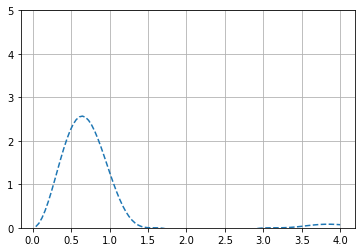

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

time_values = np.linspace(0, 4, 100)
f_values = map(eval_f, time_values)

ax.plot(time_values, list(f_values), '--')
ax.set_ylim([0, 5])
ax.grid(True)
plt.show()

Gdyby ta funkcja była stała, to byłoby ok, ale tak to wygląda jakby $C_1 * C_2$ miało być zmienne

### Kolejne zadania można rozwiązać z użyciem dowolnej biblioteki pozwalających tworzyć wykresy i animacje (może, ale nie musi to być biblioteka matplotlib).

## Zadanie 2
  
Zaprogramować znalezione w zadaniu 1 rozwiązanie, tj. zaimplementować funkcję $u(x, t)$ i zilustrować rozwiązanie na wykresach.
  
Na ocenę 4: poprawna implementacja funkcji $u(x, t)$ oraz przedstawienie rozwiązania na kilku (3-5) wykresach:  
Pierwszy wykres ma przedstawiać wykres funkcji $u(x, t)$ w momencie $t=0$, kolejne zaś funkcję $u(x, t)$ dla kolejnych momentów czasowych ($t>0$) dobranych tak, aby można było zaobserwować na kolejnych wykresach stopniowe wyrównywanie się temperatury.

## Zadanie 3
Zaprogramować animację, przedstawiającą przebieg rozkładu temperatury w czasie (wyrównywanie się temperatury).